In [12]:
import matplotlib.pyplot as plt
import numpy as np
import astropy.io.ascii
%matplotlib inline

## Here is a planet-star orbit configuration:
![rv_01](rv_01.png)

## More realistically, it looks like this with the sky X-Y plane:
![](rv_02.png)

## The equation to calculate RV is as follows (from Murray & Correia chaper): 
<img src="rv_03.png" width="600">

## where $n = 2\pi / T$ and $T$ is period, semi-major axis a is related to period T via Kepler's 3rd law
![rv_04](rv_04.png)

## f is calculated as follows:
## $f = 2 \times \tan^{-1}[\ (\frac{ 1+e }{ 1-e } )^{0.5} \cdot \tan( \frac{E}{2} )\ ]$
## where E is eccentric anomaly, which can only be calculated numerically for $e\neq0$
## The solution can be found in the following equation:
![rv_05](rv_05.png)
## That means if $t$, time at which observations are made, $t_0$, time at periastron, and $e$, eccentricity are known, E can be calculated numerically, which has been provided in $radvel.kepler.kepler$ function. 

## Now we have five parameters in orbital solution: 
1. Period (T)
2. Time at periastron ($t_0$)
3. Eccentricity (e)
4. Longitude of periastron ($\omega$)
5. RV semi-amplitude (K)

## Let's see how each component affects RV curve. First, let's look at the RV semi-amplitude.

## First, we use Jupiter as an example to draw it RV curve

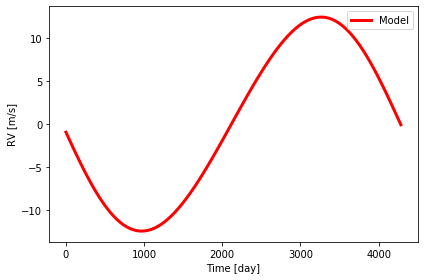

In [13]:
m_p = 1.0
m_s = 1.0
per = 11.86 * 365.0
t0 = 2454438.751157
ecc = 0.048
omega = np.pi / 2.0

import radvel
K = radvel.utils.semi_amplitude(m_p, per, m_s, ecc, Msini_units='jupiter')

orbital_solution = [per, t0, ecc, omega, K]

t = np.linspace(0, per, 100)
rvs = radvel.kepler.rv_drive(t, orbital_solution, use_c_kepler_solver=False)



# Fold data and plot model against data
ind = np.argsort(t % per)
plt.plot((t % per)[ind], rvs[ind], "r-", label="Model", lw=3)
plt.legend()
plt.xlabel("Time [day]")
plt.ylabel("RV [m/s]")
plt.tight_layout()

## RV semi-amplitude of 12 m/s is sensible, how about Earth? Notice that $Msini\_units$ is changed to $Earth$.

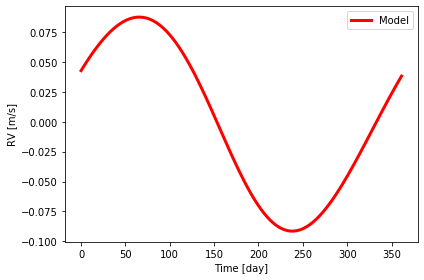

In [14]:
m_p = 1.0
m_s = 1.0
per = 1.0 * 365.0
t0 = 2454438.751157
ecc = 0.048
omega = 90.0

import radvel
K = radvel.utils.semi_amplitude(m_p, per, m_s, ecc, Msini_units='Earth')

orbital_solution = [per, t0, ecc, omega, K]

t = np.linspace(0, per, 100)
rvs = radvel.kepler.rv_drive(t, orbital_solution, use_c_kepler_solver=False)



# Fold data and plot model against data
ind = np.argsort(t % per)
plt.plot((t % per)[ind], rvs[ind], "r-", label="Model", lw=3)
plt.legend()
plt.xlabel("Time [day]")
plt.ylabel("RV [m/s]")
plt.tight_layout()

## 0.08 m/s semi-amplitude is also sensible, we are on the right track.

## How abou the impact of period? I am going to use Jupiter as an example, varying only its period.

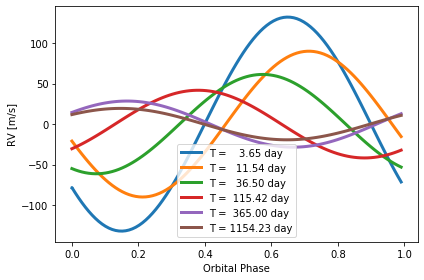

In [15]:
m_p = 1.0
m_s = 1.0
t0 = 2454438.751157
ecc = 0.0
omega = 90.0



per_arr = 10**np.arange(-2,1,0.5) * 365.0
for per in per_arr:
    K = radvel.utils.semi_amplitude(m_p, per, m_s, ecc, Msini_units='Jupiter')
    orbital_solution = [per, t0, ecc, omega, K]
    t = np.linspace(0, per, 100)
    rvs = radvel.kepler.rv_drive(t, orbital_solution, use_c_kepler_solver=False)
    # Fold data and plot model against data
    ind = np.argsort(t % per)
    plt.plot((t % per)[ind] / per, rvs[ind], label="T = {0:7.2f} day".format(per), lw=3)

plt.legend()
plt.xlabel("Orbital Phase")
plt.ylabel("RV [m/s]")
plt.tight_layout()

## K is scaled with $T^{-1/3}$ as shown from the above figure. The relationship can also be deduced from equation 66 and the Kepler's 3rd law.

## Now let's look at $t_0$, time at periastron. Since we plot RV vs. phase, I will set the period at a ramdon 100 day. 

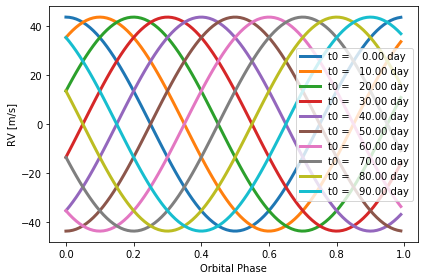

In [16]:
m_p = 1.0
m_s = 1.0
ecc = 0.0
omega = 0.0
per = 100.0
t0 = 0.0


t0_arr = t0 + np.arange(0, 99, 10)
for t0 in t0_arr:
    K = radvel.utils.semi_amplitude(m_p, per, m_s, ecc, Msini_units='Jupiter')
    orbital_solution = [per, t0, ecc, omega, K]
    t = np.linspace(0, per, 100)
    rvs = radvel.kepler.rv_drive(t, orbital_solution, use_c_kepler_solver=False)
    # Fold data and plot model against data
    ind = np.argsort(t % per)
    plt.plot((t % per)[ind] / per, rvs[ind], label="t0 = {0:7.2f} day".format(t0), lw=3)

plt.legend()
plt.xlabel("Orbital Phase")
plt.ylabel("RV [m/s]")
plt.tight_layout()

## Focusing on the t0 = 0 day curve (blue) and recall the 3-D figure with sky plane and the planet-star orbit, at t = 0 day, the planet is at periastron and moves towards the observer (z direction), so the star is moving away from the observer because of reflex motion. As a result, the star RV is redshifted at maximal value (positive RV as a convention). 

## Another example would be the t0 = 10 day curve. In this case, time at periastron is at 10 day (by definition), so at t = 10 day, the star RV reaches its maximum. 

## Now let's see how eccentricity affect RV signals:

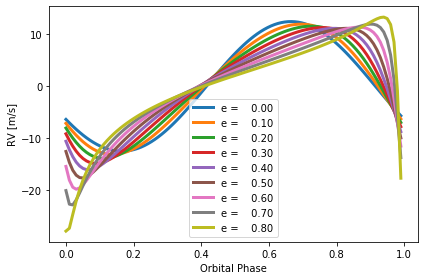

In [17]:
m_p = 1.0
m_s = 1.0
t0 = 2454438.751157
omega = 90.0
per = 11.86 * 365.0


ecc_arr = np.arange(0, 0.85, 0.1)
for ecc in ecc_arr:
    K = radvel.utils.semi_amplitude(m_p, per, m_s, ecc, Msini_units='Jupiter')
    orbital_solution = [per, t0, ecc, omega, K]
    t = np.linspace(0, per, 100)
    rvs = radvel.kepler.rv_drive(t, orbital_solution, use_c_kepler_solver=False)
    # Fold data and plot model against data
    ind = np.argsort(t % per)
    plt.plot((t % per)[ind] / per, rvs[ind], label="e = {0:7.2f}".format(ecc), lw=3)

plt.legend()
plt.xlabel("Orbital Phase")
plt.ylabel("RV [m/s]")
plt.tight_layout()

## As eccentricity increases, RV signal as periastron increases.

## The effect of $\omega$, longtitude of periastron is similar to $t_0$

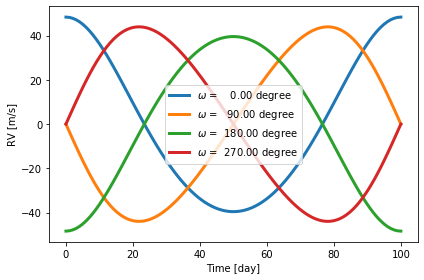

In [18]:
m_p = 1.0
m_s = 1.0
ecc = 0.1
omega = 0.0
per = 100.0
t0 = 0.0


omega_arr = omega + np.arange(0, 2*np.pi, np.pi/2.0)
for omega in omega_arr:
    K = radvel.utils.semi_amplitude(m_p, per, m_s, ecc, Msini_units='Jupiter')
    orbital_solution = [per, t0, ecc, omega, K]
    t = np.linspace(0, per, 100)
    rvs = radvel.kepler.rv_drive(t, orbital_solution, use_c_kepler_solver=False)
#     # Fold data and plot model against data
#     ind = np.argsort(t % per)
#     plt.plot((t % per)[ind] / per, rvs[ind], label="$\omega$ = {0:7.2f}".format(omega), lw=3)
    plt.plot(t, rvs, label="$\omega$ = {0:7.2f} degree".format(omega / np.pi * 180), lw=3)

plt.legend()
plt.xlabel("Time [day]")
plt.ylabel("RV [m/s]")
plt.tight_layout()

## Now chech out a visualization of RV signal change as a function of $\omega$. The tool can be found at: https://astro.unl.edu/classaction/animations/extrasolarplanets/radialvelocitysimulator.html

![rv_06](rv_06.png)